# Project: **Data Jobs Salaries in Mexico on August 2022**
___
___
## **3. Data Analysis and Visualization**
___

Author: **Daniel Eduardo López**

GitHub: **_https://github.com/DanielEduardoLopez_**

LinkedIn: **_https://www.linkedin.com/in/daniel-eduardo-lopez_**

Email: **_daniel-eduardo-lopez@outlook.com_**
___

The purpose of the present notebook is to perform the **data analysis and visualization** of the cleaned dataset in order to answer the main research question as well as obtaining further insights from the data.

**Main Question:**
Which data job category has the highest salary in the Mexican labor market in August 2022 according to the OCC website?
- Business Analyst
- Data Analyst
- Data Architect
- Data Engineer
- Data Scientist

It is hypothesed that Data Scientist are the ones with the highest salaries. Nonetheless, that was confirmed or rejected with factual below.

To do so, first, the dataset was loaded to a Pandas dataframe. Then, the data was analyzed through some descriptive statistical calculations with Pandas and Numpy libraries. Moreover, to gain further understanding and insights through visualizations, the Matplotlib, Seaborn and Folium libraries were used.

### **1. Data loading**
___

In [1]:
# !pip install folium

In [2]:
# Libraries importation
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [4]:
# For a ggplot-like plotting style
mpl.style.use('ggplot') 

In [5]:
# Loading of the dataframe with the cleaned data
df = pd.read_csv('Dataset_Clean.csv')

### **2. What is the Most Demanded Data Job?**
___

In [6]:
# Basic info of the first dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job             444 non-null    object 
 1   Company         444 non-null    object 
 2   Location        444 non-null    object 
 3   Average Salary  157 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.0+ KB


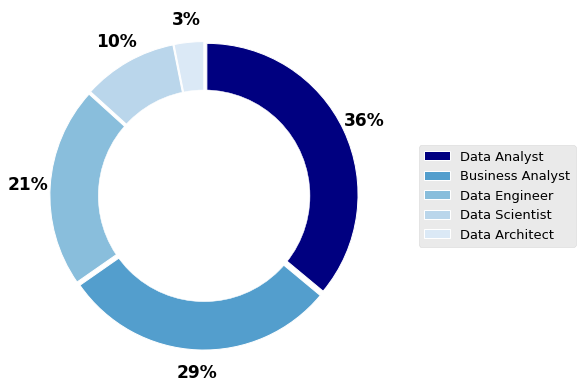

In [7]:
# Donut chart of the data jobs demand
fig, ax = plt.subplots(figsize = (9, 14))
colors = sns.color_palette('Blues_r')
explode = [0.02] * 5
wedges, texts, autotexts = ax.pie(x = list(df['Job'].value_counts().values), wedgeprops=dict(edgecolor='w', linewidth= 1),
        textprops = dict(size=17, weight="bold", color = 'black'), colors = ['navy',colors[2],colors[3],colors[4],colors[5]], 
        autopct='%.0f%%', pctdistance=1.15, startangle = 90, counterclock = False, explode = explode)
center = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(center)
plt.legend(wedges, list(df['Job'].value_counts().keys()), fontsize=13, loc="center right", bbox_to_anchor=(1.2, 0, 0.3, 1))
plt.tight_layout()
plt.show()

From the above plot, it is possible to conclude that more than a third of the data jobs (**36%**) correspond to positions of **Data Analyst**, rendering them as **the most demanded** ones in the Mexican labor market at the time of this study (August 2022). In second place, it is possible to found the positions of **Business Analyst** with a **29%** of the total. 

Furthermore, it is noteworthy that **Data Engineer** positions are more demanded than **Data Scientist** positions with a **21%** and an **10%**, respectively. 

On the contrary, **Data Architect** positions are the less demanded, with only a **3%** out of the total.



### **3. Where do the Most Data Jobs Locate?**
___

In [8]:
# States dictionary with corresponding ID
states_dict = {'Aguascalientes': 'AS', 
            'Baja California': 'BC', 
            'Baja California Sur': 'BS', 
            'Campeche': 'CC',
            'Ciudad de México':'DF',
            'Chiapas': 'CS',
            'Chihuahua':'CH',
            'Coahuila':'CL',
            'Colima':'CM',
            'Durango':'DG',
            'Estado de México':'MC',
            'Guanajuato':'GT',
            'Guerrero':'GR',
            'Hidalgo':'HG',
            'Jalisco':'JC',
            'Michoacán':'MN',
            'Morelos':'MS',
            'Nayarit':'NT',
            'Nuevo León':'NL',
            'Oaxaca':'OC',
            'Puebla':'PL',
            'Querétaro':'QT',
            'Quintana Roo':'QR',
            'San Luis Potosí':'SP',
            'Sinaloa':'SL',
            'Sonora':'SR',
            'Tabasco':'TC',
            'Tamaulipas':'TS',
            'Tlaxcala':'TL',
            'Veracruz':'VZ',
            'Yucatán':'YN',
            'Zacatecas':'ZS'}

states_df = pd.DataFrame.from_dict(states_dict, orient='index').reset_index().rename(columns={"index": "State", 0: "ID"}).set_index('State')
states_df.head(10)

,ID
State,
Aguascalientes,AS
Baja California,BC
Baja California Sur,BS
Campeche,CC
Ciudad de México,DF
Chiapas,CS
Chihuahua,CH
Coahuila,CL
Colima,CM


In [9]:
# Calculating the Demand Percentage per State

demand = pd.DataFrame(df['Location'].value_counts())
total = sum(demand['Location'])
demand['Percentage'] = (demand['Location']) / total *100
demand = demand.reset_index().rename(columns={"index": "State", "Location": "Count"})
demand.head(10)


,State,Count,Percentage
0,Ciudad de México,260,58.558559
1,Nuevo León,58,13.063063
2,Estado de México,56,12.612613
3,Jalisco,24,5.405405
4,Querétaro,16,3.603604
5,Guanajuato,5,1.126126
6,Sinaloa,4,0.900901
7,Yucatán,4,0.900901
8,Chihuahua,3,0.675676
9,Morelos,2,0.450450


In [10]:
# Final DataFrame for the Chloropleth visualization
states_df = states_df.merge(demand, left_on='State', right_on='State', how = 'outer').fillna(0)
states_df.head(10)

,State,ID,Count,Percentage
0,Aguascalientes,AS,1.0,0.225225
1,Baja California,BC,2.0,0.450450
2,Baja California Sur,BS,0.0,0.000000
3,Campeche,CC,0.0,0.000000
4,Ciudad de México,DF,260.0,58.558559
5,Chiapas,CS,0.0,0.000000
6,Chihuahua,CH,3.0,0.675676
7,Coahuila,CL,0.0,0.000000
8,Colima,CM,0.0,0.000000
9,Durango,DG,0.0,0.000000


In [36]:
# Initialization of map
m = folium.Map(location=[24,-105], zoom_start=5)

# Setting of the Choropleth
folium.Choropleth(
    geo_data = 'https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json',
    name = "Data Jobs Localization",
    data = states_df,
    columns = ["ID", "Percentage"],
    key_on = "feature.id",
    fill_color = "Blues_r",
    fill_opacity = 0.7,
    line_opacity = 0.1,
    legend_name = "Data Jobs Demand (%)",
).add_to(m)

# Setting of the Layer Control
folium.LayerControl().add_to(m)

# Showing the map
m


The map above strongly suggests that **most of the data jobs are concentrated in the capital Mexico City** with almost **60%** of the demand at the moment of this study (August 2022). 

On the other hand, according to the data, **Nuevo León** and the **State of Mexico** (**"Estado de México"** in Spanish) represent a far second place, with only about **13%** of the total demand.

**Reference for JSON file:**

**Arroyo-Velázquez, M. I. (2022)**. _states_mx_. https://raw.githubusercontent.com/isaacarroyov/data_visualization_practice/master/Python/visualizing_mexican_wildfires_tds/data/states_mx.json

## **3. How is the Data Jobs Demand Per State?**
___

In [24]:
# Data jobs per State
jobs_per_state_pivot = df.pivot_table(index = 'Location', columns = 'Job', values = 'Company', aggfunc = 'count').fillna(0).reset_index()
jobs_per_state_pivot['Total'] = jobs_per_state_pivot['Business Analyst'] + jobs_per_state_pivot['Data Analyst'] + jobs_per_state_pivot['Data Architect'] + jobs_per_state_pivot['Data Engineer'] + jobs_per_state_pivot['Data Scientist']
jobs_per_state_pivot = jobs_per_state_pivot.sort_values('Total', ascending = True)
jobs_per_state_pivot.head()

Job,Location,Business Analyst,Data Analyst,Data Architect,Data Engineer,Data Scientist,Total
0,Aguascalientes,1.0,0.0,0.0,0.0,0.0,1.0
15,Tamaulipas,0.0,1.0,0.0,0.0,0.0,1.0
14,Sonora,1.0,0.0,0.0,0.0,0.0,1.0
9,Oaxaca,0.0,1.0,0.0,0.0,0.0,1.0
12,Quintana Roo,1.0,1.0,0.0,0.0,0.0,2.0


<Figure size 864x576 with 0 Axes>

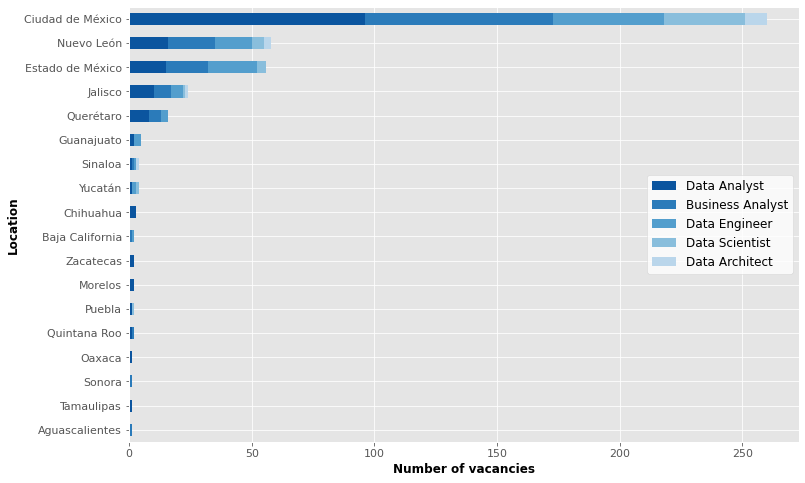

In [25]:
# Stack bar chart of Data jobs per State
plt.figure(figsize = (12, 8))
jobs_per_state_pivot.set_index('Location').plot.barh(stacked=True, 
                                                     y = ['Data Analyst',	'Business Analyst',	'Data Engineer','Data Scientist', 'Data Architect'], 
                                                     color=sns.color_palette('Blues_r'),
                                                     figsize=(12, 8) )
plt.legend(facecolor = 'white', loc = 'center right', fontsize = 12)
plt.xlabel('Number of vacancies', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

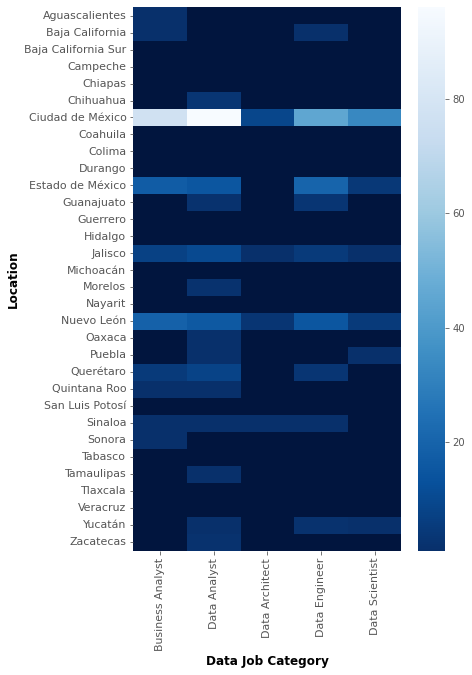

In [26]:
# Heatmap of Data jobs per State
heatmap_data = jobs_per_state_pivot.set_index('Location').merge(states_df, left_on='Location', right_on='State', how = 'outer').fillna(0).drop(columns = ['Total','ID',	'Count','Percentage']).sort_values('State', ascending = True).set_index('State')
plt.figure(figsize = (6,10))
hm = sns.heatmap(heatmap_data, 
            cmap = "Blues_r",
            mask = (heatmap_data == 0))
hm.set_facecolor('xkcd:navy')
plt.xlabel('Data Job Category', weight = 'bold', fontsize = 12, color = 'black')
plt.ylabel('Location', weight = 'bold', fontsize = 12, color = 'black')
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

In [15]:
# Unpivoting the table
jobs_per_state_selected = jobs_per_state_pivot.loc[(jobs_per_state_pivot['Location'] == 'Ciudad de México') 
                                          | (jobs_per_state_pivot['Location'] == 'Estado de México') 
                                          | (jobs_per_state_pivot['Location'] == 'Jalisco') 
                                          | (jobs_per_state_pivot['Location'] == 'Nuevo León')].sort_values('Total', ascending = False)
jobs_per_state_selected = pd.melt(jobs_per_state_selected, id_vars= 'Location', value_vars = ['Business Analyst',	'Data Analyst',	'Data Architect',	'Data Engineer','Data Scientist'], var_name= 'Data Job', value_name='Count')
jobs_per_state_selected.head()

,Location,Data Job,Count
0,Ciudad de México,Business Analyst,28.0
1,Estado de México,Business Analyst,4.0
2,Nuevo León,Business Analyst,3.0
3,Jalisco,Business Analyst,0.0
4,Ciudad de México,Data Analyst,45.0


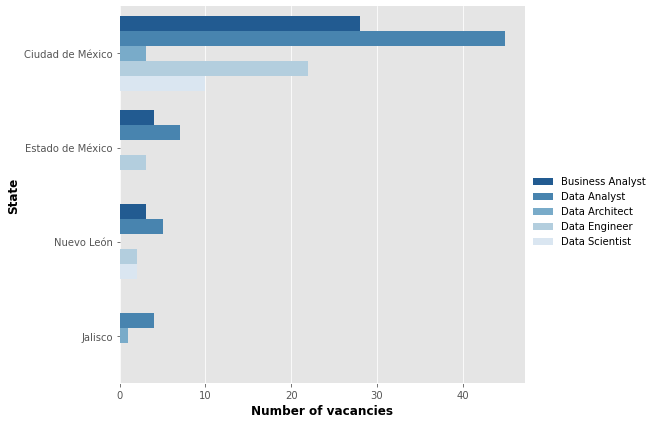

In [27]:
# Grouped bar chart of each data job for selected states
g = sns.catplot(
    data = jobs_per_state_selected, kind = "bar",
    x = "Count", y = "Location", hue = "Data Job",
    ci = "sd", palette = "Blues_r", alpha = 1, height = 6,
    aspect = 1.3
)
g.despine(left=True)
g.set_axis_labels("Number of vacancies", "State", weight="bold", color = 'black')
g.legend.set_title("")


## 4. What are the Companies Demanding More Data Jobs?
___